<a href="https://colab.research.google.com/github/shubham62025865/shubham1/blob/main/outlier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OUTLIER **DETECTION**
ALL SEASEION CSV DATA

Methods for detecting Outliers
Boxplots (for visualizing outliers)
Z-score (for normally distributed data)
Inter Quantile Range(IQR) (for skewed data)
percentile **method**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv("/content/all_seasons.csv")

In [3]:
df

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11140,11140,Maxi Kleber,DAL,28.0,208.28,108.862080,NaN,Germany,Undrafted,Undrafted,...,9.1,5.4,1.1,4.6,0.056,0.140,0.136,0.605,0.064,2019-20
11141,11141,Melvin Frazier Jr.,ORL,23.0,195.58,97.522280,Tulane,USA,2018,2,...,1.2,0.3,0.1,-2.4,0.018,0.058,0.164,0.480,0.033,2019-20
11142,11142,Meyers Leonard,MIA,28.0,213.36,117.933920,Illinois,USA,2012,1,...,6.1,5.1,1.1,5.6,0.029,0.217,0.120,0.640,0.076,2019-20
11143,11143,Norvel Pelle,PHI,27.0,208.28,104.779752,NaN,USA,Undrafted,Undrafted,...,2.1,3.0,0.4,-16.4,0.085,0.237,0.126,0.521,0.056,2019-20


In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
df.dtypes

,0
Unnamed: 0,int64
player_name,object
team_abbreviation,object
age,float64
player_height,float64
player_weight,float64
college,object
country,object
draft_year,object
draft_round,object


In [6]:
df.shape

(11145, 22)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11145 entries, 0 to 11144
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         11145 non-null  int64  
 1   player_name        11145 non-null  object 
 2   team_abbreviation  11145 non-null  object 
 3   age                11145 non-null  float64
 4   player_height      11145 non-null  float64
 5   player_weight      11145 non-null  float64
 6   college            9461 non-null   object 
 7   country            11145 non-null  object 
 8   draft_year         11145 non-null  object 
 9   draft_round        11145 non-null  object 
 10  draft_number       11145 non-null  object 
 11  gp                 11145 non-null  int64  
 12  pts                11145 non-null  float64
 13  reb                11145 non-null  float64
 14  ast                11145 non-null  float64
 15  net_rating         11145 non-null  float64
 16  oreb_pct           111

In [8]:
df.isnull().sum()

,0
Unnamed: 0,0
player_name,0
team_abbreviation,0
age,0
player_height,0
player_weight,0
college,1684
country,0
draft_year,0
draft_round,0


In [9]:
df.describe()

,Unnamed: 0,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
count,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000
mean,5572.000000,27.168686,200.812818,100.637868,52.005832,8.126487,3.560036,1.801463,-2.153899,0.055593,0.141772,0.185599,0.508099,0.131078
std,3217.428709,4.344164,9.190973,12.576295,25.069495,5.935482,2.495394,1.789940,12.150611,0.043889,0.063194,0.053047,0.098879,0.095017
min,0.000000,18.000000,160.020000,60.327736,1.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2786.000000,24.000000,195.580000,90.718400,32.000000,3.500000,1.800000,0.600000,-6.300000,0.022000,0.096000,0.150000,0.478000,0.065000
50%,5572.000000,27.000000,200.660000,99.790240,58.000000,6.600000,3.000000,1.200000,-1.300000,0.043000,0.132000,0.182000,0.521000,0.102000
75%,8358.000000,30.000000,208.280000,109.315672,74.000000,11.500000,4.700000,2.400000,3.200000,0.086000,0.182000,0.218000,0.557000,0.178000
max,11144.000000,44.000000,231.140000,163.293120,85.000000,36.100000,16.300000,11.700000,300.000000,1.000000,1.000000,1.000000,1.500000,1.000000


In [10]:
df.columns

Index(['Unnamed: 0', 'player_name', 'team_abbreviation', 'age',
       'player_height', 'player_weight', 'college', 'country', 'draft_year',
       'draft_round', 'draft_number', 'gp', 'pts', 'reb', 'ast', 'net_rating',
       'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct', 'season'],
      dtype='object')

In [11]:
df

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11140,11140,Maxi Kleber,DAL,28.0,208.28,108.862080,NaN,Germany,Undrafted,Undrafted,...,9.1,5.4,1.1,4.6,0.056,0.140,0.136,0.605,0.064,2019-20
11141,11141,Melvin Frazier Jr.,ORL,23.0,195.58,97.522280,Tulane,USA,2018,2,...,1.2,0.3,0.1,-2.4,0.018,0.058,0.164,0.480,0.033,2019-20
11142,11142,Meyers Leonard,MIA,28.0,213.36,117.933920,Illinois,USA,2012,1,...,6.1,5.1,1.1,5.6,0.029,0.217,0.120,0.640,0.076,2019-20
11143,11143,Norvel Pelle,PHI,27.0,208.28,104.779752,NaN,USA,Undrafted,Undrafted,...,2.1,3.0,0.4,-16.4,0.085,0.237,0.126,0.521,0.056,2019-20


In [12]:
df.drop(columns=["Unnamed: 0"],inplace=True)

In [13]:
df

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,27,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,24,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,58,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,9,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,10,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11140,Maxi Kleber,DAL,28.0,208.28,108.862080,NaN,Germany,Undrafted,Undrafted,Undrafted,...,9.1,5.4,1.1,4.6,0.056,0.140,0.136,0.605,0.064,2019-20
11141,Melvin Frazier Jr.,ORL,23.0,195.58,97.522280,Tulane,USA,2018,2,35,...,1.2,0.3,0.1,-2.4,0.018,0.058,0.164,0.480,0.033,2019-20
11142,Meyers Leonard,MIA,28.0,213.36,117.933920,Illinois,USA,2012,1,11,...,6.1,5.1,1.1,5.6,0.029,0.217,0.120,0.640,0.076,2019-20
11143,Norvel Pelle,PHI,27.0,208.28,104.779752,NaN,USA,Undrafted,Undrafted,Undrafted,...,2.1,3.0,0.4,-16.4,0.085,0.237,0.126,0.521,0.056,2019-20


In [14]:
df["player_weight"].describe()

,player_weight
count,11145.000000
mean,100.637868
std,12.576295
min,60.327736
25%,90.718400
50%,99.790240
75%,109.315672
max,163.293120


In [15]:
import plotly.express as px
fig=px.box(df,x="player_weight",width=700,height=500)
fig.show()

<Axes: xlabel='player_weight'>

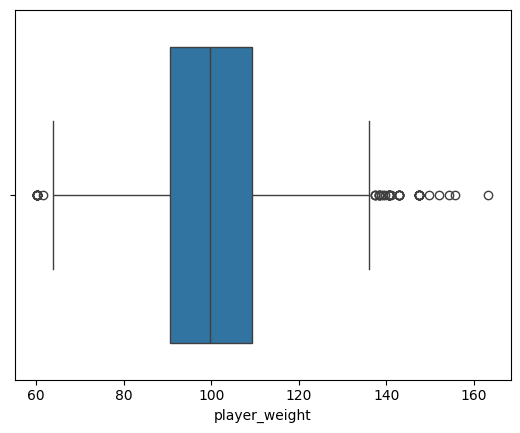

In [16]:
sns.boxplot(data = df["player_weight"], orient = "h")

<Axes: xlabel='player_height'>

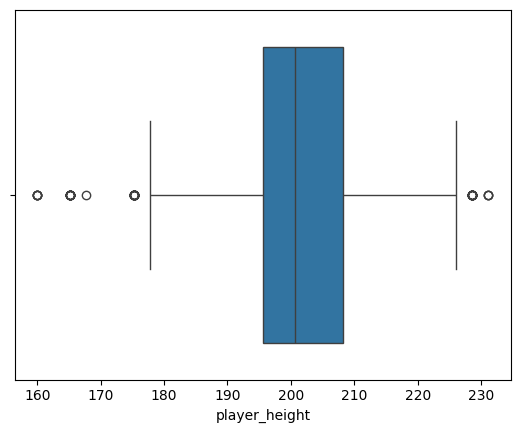

In [17]:
sns.boxplot(data=df["player_height"],orient="h")

<Axes: >

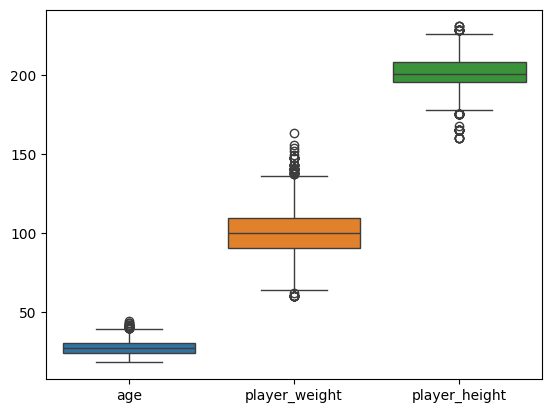

In [18]:
sns.boxplot(data = df[["age", "player_weight", "player_height"]])

<Axes: xlabel='age', ylabel='Count'>

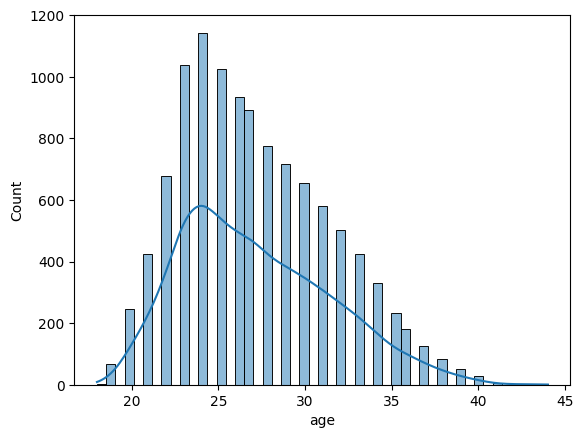

In [19]:
sns.histplot(data = df.age, kde = True)

<Axes: xlabel='player_weight', ylabel='Count'>

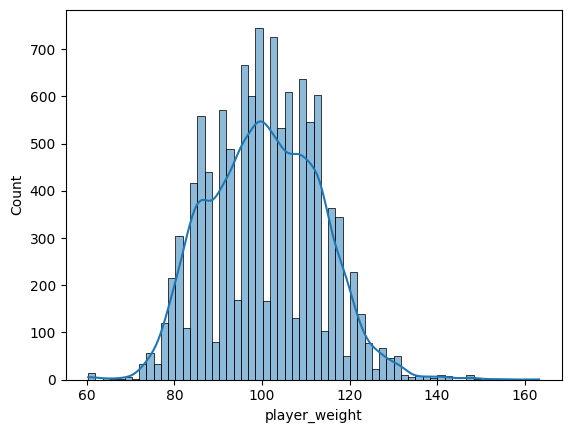

In [20]:
sns.histplot(data=df["player_weight"],kde=True)

<Axes: xlabel='player_height', ylabel='Count'>

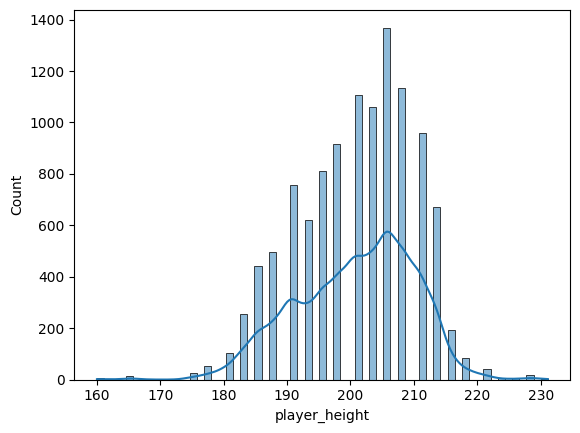

In [21]:
sns.histplot(data = df["player_height"], kde = True)

<Axes: xlabel='age', ylabel='Count'>

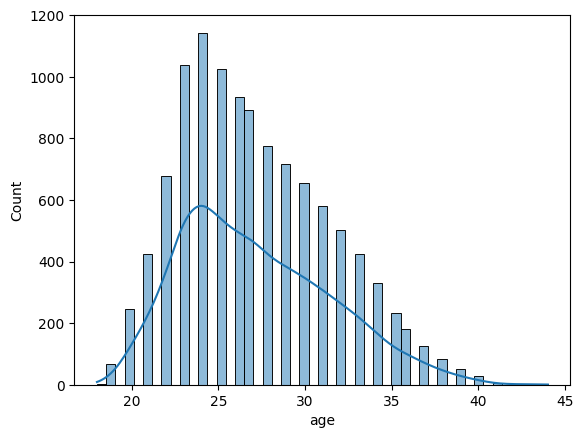

In [22]:
sns.histplot(data=df["age"], kde=True)

<Axes: ylabel='Count'>

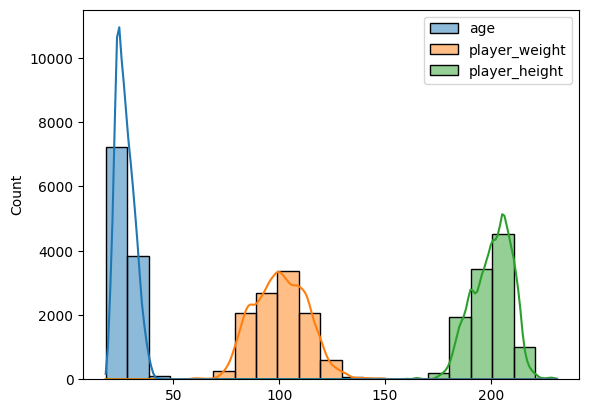

In [23]:
sns.histplot(data=df[["age", "player_weight", "player_height"]],kde=True)

In [24]:
df["age"].skew()

0.5458567811632224

In [25]:
df["player_weight"].skew()

0.1469057175740028

In [26]:
df["player_height"].skew()

-0.3775857815158464

In [27]:
df["player_weight"].describe()

,player_weight
count,11145.000000
mean,100.637868
std,12.576295
min,60.327736
25%,90.718400
50%,99.790240
75%,109.315672
max,163.293120


In [28]:
df

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,27,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,24,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,58,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,9,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,10,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11140,Maxi Kleber,DAL,28.0,208.28,108.862080,NaN,Germany,Undrafted,Undrafted,Undrafted,...,9.1,5.4,1.1,4.6,0.056,0.140,0.136,0.605,0.064,2019-20
11141,Melvin Frazier Jr.,ORL,23.0,195.58,97.522280,Tulane,USA,2018,2,35,...,1.2,0.3,0.1,-2.4,0.018,0.058,0.164,0.480,0.033,2019-20
11142,Meyers Leonard,MIA,28.0,213.36,117.933920,Illinois,USA,2012,1,11,...,6.1,5.1,1.1,5.6,0.029,0.217,0.120,0.640,0.076,2019-20
11143,Norvel Pelle,PHI,27.0,208.28,104.779752,NaN,USA,Undrafted,Undrafted,Undrafted,...,2.1,3.0,0.4,-16.4,0.085,0.237,0.126,0.521,0.056,2019-20


In [29]:

df["player_weight"].mean(),df["player_weight"].std()

(100.63786774840734, 12.576294953015436)

In [30]:
df["z_score_player_weight"]=(df["player_weight"]-df["player_weight"].mean())/df["player_weight"].std()

In [31]:
df.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,z_score_player_weight
0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,27,...,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97,-0.067399
1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,24,...,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97,1.375290
2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,58,...,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97,-0.428071
3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,9,...,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97,0.004736
4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,10,...,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97,0.653946


In [35]:

df[(df["z_score_player_weight"] > 3) |(df["z_score_player_weight"] < -3)]

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,z_score_player_weight
331,Priest Lauderdale,ATL,23.0,223.52,155.582056,Central State (OH),USA,1996,1,28,...,1.2,0.3,-4.0,0.093,0.164,0.284,0.560,0.107,1996-97,4.368869
406,Oliver Miller,TOR,27.0,205.74,140.613520,Arkansas,USA,1992,1,22,...,5.0,1.4,-1.0,0.107,0.204,0.141,0.539,0.116,1996-97,3.178651
469,Priest Lauderdale,DEN,24.0,223.52,147.417400,Central State (OH),USA,1996,1,28,...,2.6,0.5,-6.2,0.093,0.251,0.268,0.460,0.121,1997-98,3.719659
480,Oliver Miller,TOR,28.0,205.74,147.417400,Arkansas,USA,1992,1,22,...,6.3,3.1,-9.9,0.099,0.177,0.149,0.485,0.187,1997-98,3.719659
641,Spud Webb,ORL,34.0,167.64,60.327736,North Carolina State,USA,1985,4,87,...,0.8,1.3,-24.6,0.067,0.038,0.252,0.466,0.294,1997-98,-3.205247
650,Shaquille O'Neal,LAL,26.0,215.90,142.881480,Louisiana State,USA,1992,1,1,...,11.4,2.4,15.6,0.114,0.236,0.331,0.587,0.125,1997-98,3.358987
1059,Shaquille O'Neal,LAL,27.0,215.90,142.881480,Louisiana State,USA,1992,1,1,...,10.7,2.3,6.4,0.135,0.227,0.325,0.584,0.132,1998-99,3.358987
1161,Oliver Miller,SAC,29.0,205.74,147.417400,Arkansas,USA,1992,1,22,...,2.0,0.0,-18.8,0.194,0.038,0.177,0.455,0.000,1998-99,3.719659
1326,Earl Boykins,CLE,24.0,165.10,60.327736,Eastern Michigan,USA,Undrafted,Undrafted,Undrafted,...,1.0,1.8,-11.8,0.046,0.076,0.245,0.547,0.345,1999-00,-3.205247
1556,Shaquille O'Neal,LAL,28.0,215.90,142.881480,Louisiana State,USA,1992,1,1,...,13.6,3.8,11.0,0.116,0.246,0.313,0.578,0.184,1999-00,3.358987


In [36]:
df.shape

(11145, 22)

In [37]:
df_without_outlier=df[~((df["z_score_player_weight"] > 3) | (df["z_score_player_weight"] < -3))]

In [38]:
df_without_outlier

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,z_score_player_weight
0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,27,...,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97,-0.067399
1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,24,...,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97,1.375290
2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,58,...,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97,-0.428071
3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,9,...,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97,0.004736
4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,10,...,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97,0.653946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11140,Maxi Kleber,DAL,28.0,208.28,108.862080,NaN,Germany,Undrafted,Undrafted,Undrafted,...,5.4,1.1,4.6,0.056,0.140,0.136,0.605,0.064,2019-20,0.653946
11141,Melvin Frazier Jr.,ORL,23.0,195.58,97.522280,Tulane,USA,2018,2,35,...,0.3,0.1,-2.4,0.018,0.058,0.164,0.480,0.033,2019-20,-0.247735
11142,Meyers Leonard,MIA,28.0,213.36,117.933920,Illinois,USA,2012,1,11,...,5.1,1.1,5.6,0.029,0.217,0.120,0.640,0.076,2019-20,1.375290
11143,Norvel Pelle,PHI,27.0,208.28,104.779752,NaN,USA,Undrafted,Undrafted,Undrafted,...,3.0,0.4,-16.4,0.085,0.237,0.126,0.521,0.056,2019-20,0.329341


In [39]:
df_without_outlier.shape

(11097, 22)

<Axes: xlabel='player_weight', ylabel='Count'>

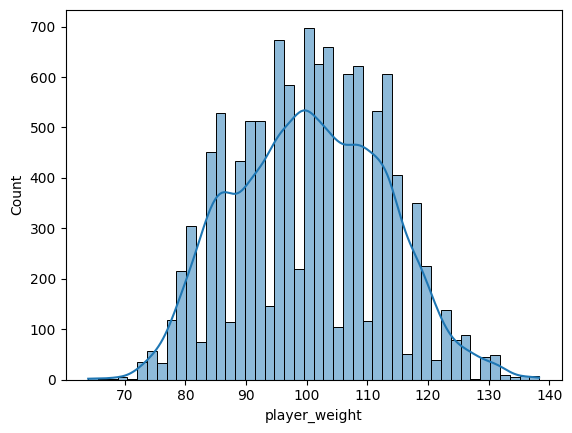

In [40]:

sns.histplot(data=df_without_outlier["player_weight"],kde=True)

In [41]:
df_without_outlier.player_weight.skew()

0.07188666926628842

In [42]:
import plotly.express as px
px.box(df_without_outlier, x = "player_weight")

<Axes: xlabel='age', ylabel='Count'>

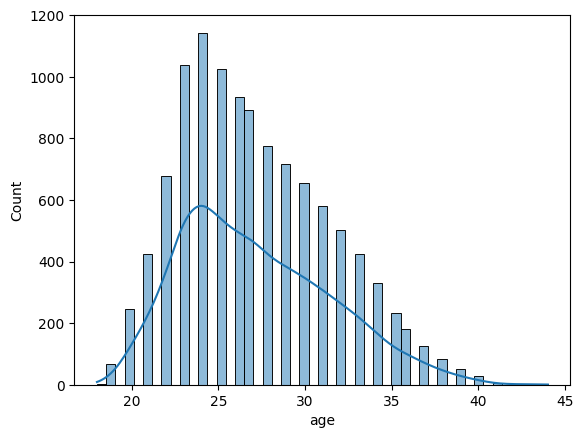

In [43]:
sns.histplot(data = df["age"], kde = True)

<Axes: ylabel='age'>

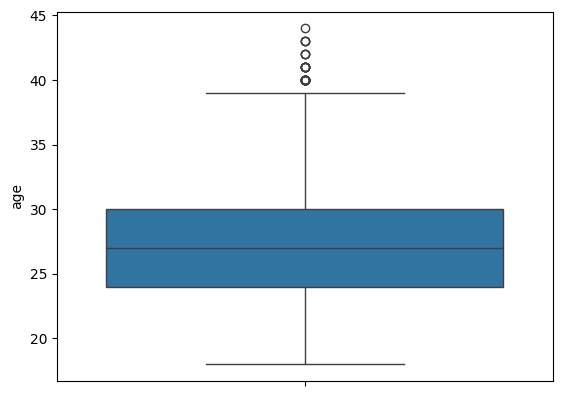

In [44]:
sns.boxplot(data = df["age"])

In [45]:
df_without_outlier.age.skew()

0.5468489789430716

In [46]:
df["z_score_age"]=(df["age"]-df["age"].mean())/df["age"].std()

In [47]:
df

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,z_score_player_weight,z_score_age
0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,27,...,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97,-0.067399,2.032915
1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,24,...,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97,1.375290,0.191364
2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,58,...,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97,-0.428071,2.723496
3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,9,...,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97,0.004736,-0.729412
4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,10,...,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97,0.653946,1.572527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11140,Maxi Kleber,DAL,28.0,208.28,108.862080,NaN,Germany,Undrafted,Undrafted,Undrafted,...,1.1,4.6,0.056,0.140,0.136,0.605,0.064,2019-20,0.653946,0.191364
11141,Melvin Frazier Jr.,ORL,23.0,195.58,97.522280,Tulane,USA,2018,2,35,...,0.1,-2.4,0.018,0.058,0.164,0.480,0.033,2019-20,-0.247735,-0.959606
11142,Meyers Leonard,MIA,28.0,213.36,117.933920,Illinois,USA,2012,1,11,...,1.1,5.6,0.029,0.217,0.120,0.640,0.076,2019-20,1.375290,0.191364
11143,Norvel Pelle,PHI,27.0,208.28,104.779752,NaN,USA,Undrafted,Undrafted,Undrafted,...,0.4,-16.4,0.085,0.237,0.126,0.521,0.056,2019-20,0.329341,-0.038830


In [48]:
df[(df["z_score_age"] > 3) |(df["z_score_age"] < -3)]

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,z_score_player_weight,z_score_age
270,Robert Parish,CHI,43.0,215.90,110.676448,Centenary (LA),USA,1976,1,8,...,0.5,14.9,0.114,0.130,0.201,0.514,0.082,1996-97,0.798214,3.644272
730,Charles Jones,HOU,41.0,205.74,97.522280,Albany State (GA),USA,1979,8,165,...,0.2,-6.2,0.098,0.111,0.049,0.689,0.055,1997-98,-0.247735,3.183884
1289,Herb Williams,NYK,41.0,210.82,117.933920,Ohio State,USA,1981,1,14,...,0.0,0.9,0.088,0.103,0.138,0.563,0.000,1998-99,1.375290,3.183884
2824,John Stockton,UTA,41.0,185.42,79.378600,Gonzaga,USA,1984,1,16,...,7.7,5.2,0.028,0.078,0.191,0.577,0.445,2002-03,-1.690424,3.183884
3144,Kevin Willis,SAS,41.0,213.36,111.130040,Michigan State,USA,1984,1,11,...,0.2,-0.9,0.108,0.182,0.244,0.491,0.059,2003-04,0.834282,3.183884
3575,Kevin Willis,ATL,42.0,213.36,111.130040,Michigan State,USA,1984,1,11,...,0.3,-15.5,0.091,0.164,0.151,0.434,0.043,2004-05,0.834282,3.414078
4473,Dikembe Mutombo,HOU,41.0,218.44,117.933920,Georgetown,Congo,1991,1,4,...,0.2,5.8,0.143,0.282,0.084,0.601,0.016,2006-07,1.375290,3.183884
4820,Kevin Willis,DAL,44.0,213.36,111.130040,Michigan State,USA,1984,1,11,...,0.2,11.9,0.063,0.222,0.184,0.432,0.034,2006-07,0.834282,3.874466
4937,Dikembe Mutombo,HOU,42.0,218.44,117.933920,Georgetown,Congo,1991,1,4,...,0.1,3.6,0.118,0.221,0.086,0.591,0.012,2007-08,1.375290,3.414078
5365,Dikembe Mutombo,HOU,43.0,218.44,117.933920,Georgetown,Congo,1991,1,4,...,0.0,1.8,0.152,0.241,0.111,0.472,0.000,2008-09,1.375290,3.644272


In [50]:
df_without_outlier=df[~((df["z_score_age"] > 3) | (df["z_score_age"] < -3))]

In [51]:
df_without_outlier.shape

(11131, 23)

In [52]:
df_without_outlier

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,z_score_player_weight,z_score_age
0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,27,...,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97,-0.067399,2.032915
1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,24,...,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97,1.375290,0.191364
2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,58,...,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97,-0.428071,2.723496
3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,9,...,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97,0.004736,-0.729412
4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,10,...,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97,0.653946,1.572527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11140,Maxi Kleber,DAL,28.0,208.28,108.862080,NaN,Germany,Undrafted,Undrafted,Undrafted,...,1.1,4.6,0.056,0.140,0.136,0.605,0.064,2019-20,0.653946,0.191364
11141,Melvin Frazier Jr.,ORL,23.0,195.58,97.522280,Tulane,USA,2018,2,35,...,0.1,-2.4,0.018,0.058,0.164,0.480,0.033,2019-20,-0.247735,-0.959606
11142,Meyers Leonard,MIA,28.0,213.36,117.933920,Illinois,USA,2012,1,11,...,1.1,5.6,0.029,0.217,0.120,0.640,0.076,2019-20,1.375290,0.191364
11143,Norvel Pelle,PHI,27.0,208.28,104.779752,NaN,USA,Undrafted,Undrafted,Undrafted,...,0.4,-16.4,0.085,0.237,0.126,0.521,0.056,2019-20,0.329341,-0.038830


<Axes: xlabel='age', ylabel='Count'>

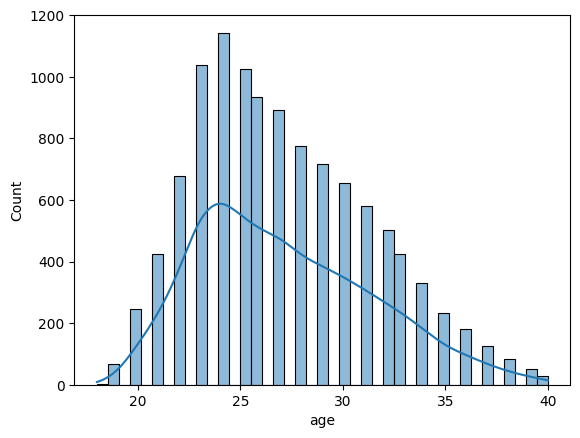

In [53]:
sns.histplot(data=df_without_outlier["age"],kde=True)

In [54]:
import plotly.express as px
px.box(df_without_outlier, x = "age")